In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/chaaland/miniconda

# Read data

In [2]:
data_folder = os.path.join("data", "raw")
dataframes = []

for fname in os.listdir(data_folder):
    ticker_symbol, ext = os.path.splitext(fname)

    if ext != ".csv":
        continue
    
    print(f"Reading '{fname}'", flush=True)

    df = pd.read_csv(os.path.join(data_folder, fname), parse_dates=True)

    df["Symbol"] = ticker_symbol
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.set_index(["Symbol", "Date"])
    dataframes.append(df)

df = pd.concat(dataframes).sort_index()

Reading 'AMZN.csv'
Reading 'FB.csv'
Reading 'NFLX.csv'
Reading 'GOOG.csv'
Reading 'AAPL.csv'


In [3]:
train_start_date = pd.to_datetime("1998-01-01")
train_end_date = pd.to_datetime("2015-12-31")

validation_start_date = pd.to_datetime("2016-01-01")
validation_end_date = pd.to_datetime("2017-12-31")

test_start_date = pd.to_datetime("2018-01-01")

In [4]:
df.head()

Open      High       Low     Close  Adj Close  \
Symbol Date                                                            
AAPL   1980-12-12  0.513393  0.515625  0.513393  0.513393   0.408971   
       1980-12-15  0.488839  0.488839  0.486607  0.486607   0.387633   
       1980-12-16  0.453125  0.453125  0.450893  0.450893   0.359183   
       1980-12-17  0.462054  0.464286  0.462054  0.462054   0.368074   
       1980-12-18  0.475446  0.477679  0.475446  0.475446   0.378743   

                        Volume  
Symbol Date                     
AAPL   1980-12-12  117258400.0  
       1980-12-15   43971200.0  
       1980-12-16   26432000.0  
       1980-12-17   21610400.0  
       1980-12-18   18362400.0

In [5]:
df_train = df[(train_start_date <= df.index.get_level_values(1)) &  (df.index.get_level_values(1) <= train_end_date)]
print(f"Train: {df_train.shape}")

Train: (16259, 6)


/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


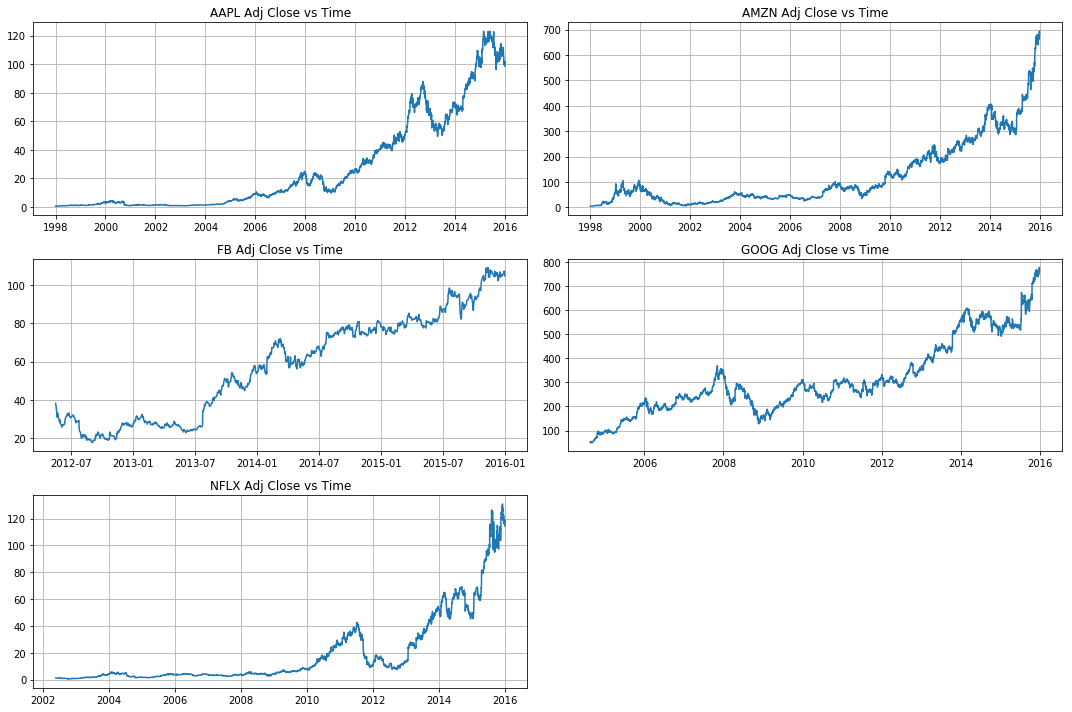

In [6]:
plt.figure(figsize=(15,10));

for i, (symbol, sub_df) in enumerate(df_train.groupby(level=0)):
    plt.subplot(3, 2, i + 1);
    plt.plot(sub_df.index.get_level_values(1), sub_df["Adj Close"]);
    plt.title(f"{symbol} Adj Close vs Time")
    plt.grid(True);
    
plt.tight_layout()

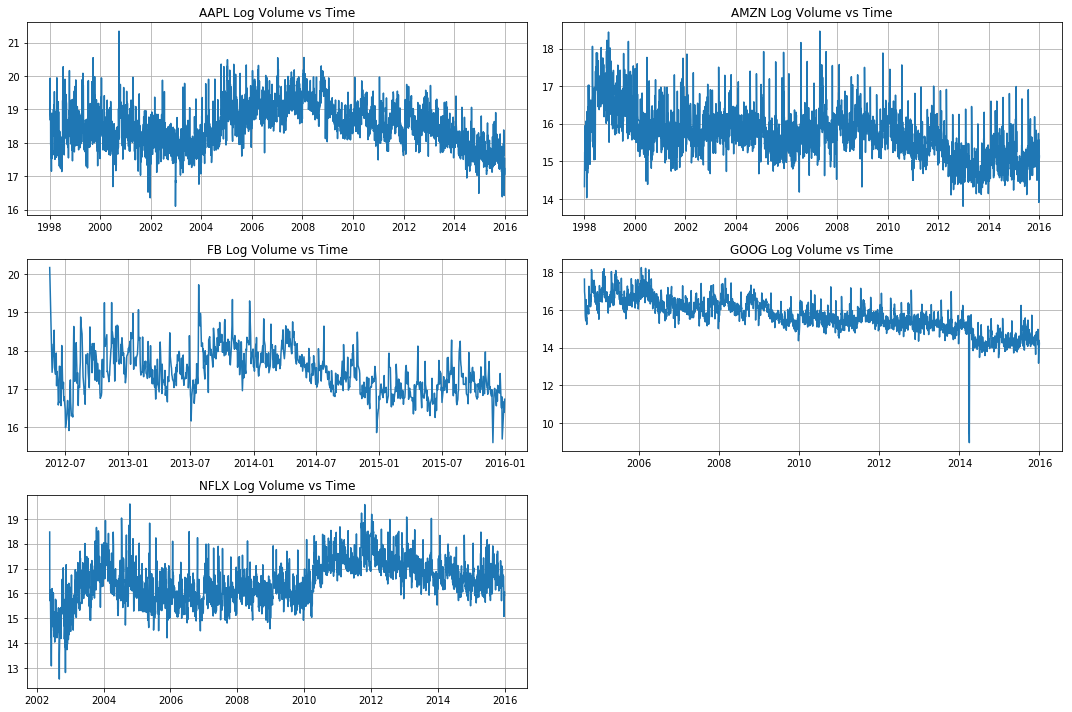

In [7]:
plt.figure(figsize=(15,10));

for i, (symbol, sub_df) in enumerate(df_train.groupby(level=0)):
    plt.subplot(3, 2, i + 1);
    plt.plot(sub_df.index.get_level_values(1), np.log1p(sub_df["Volume"]));
    plt.title(f"{symbol} Log Volume vs Time");
    plt.grid(True);
    
plt.tight_layout();

In [8]:
df_log_features = np.log1p(df.groupby("Symbol").pct_change().dropna())
df_log_features.to_parquet(os.path.join("data", "df_log_features.parquet"))
df_train_log_features = df_log_features[(train_start_date <= df_log_features.index.get_level_values(1)) &  (df_log_features.index.get_level_values(1) <= train_end_date)]


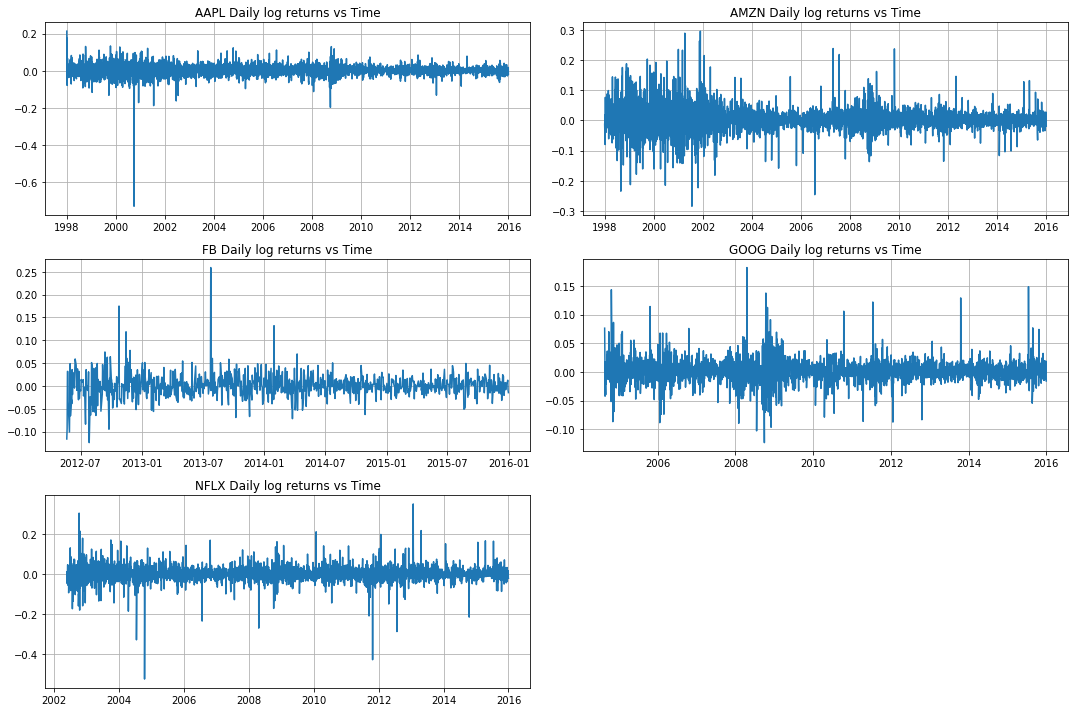

In [11]:
plt.figure(figsize=(15,10));

for i, (symbol, sub_df) in enumerate(df_train_log_features.groupby(level=0)):
    plt.subplot(3, 2, i + 1);
    plt.plot(sub_df.index.get_level_values(1), sub_df["Adj Close"].values);
    plt.title(f"{symbol} Daily log returns vs Time")
    plt.grid(True);
    
plt.tight_layout()

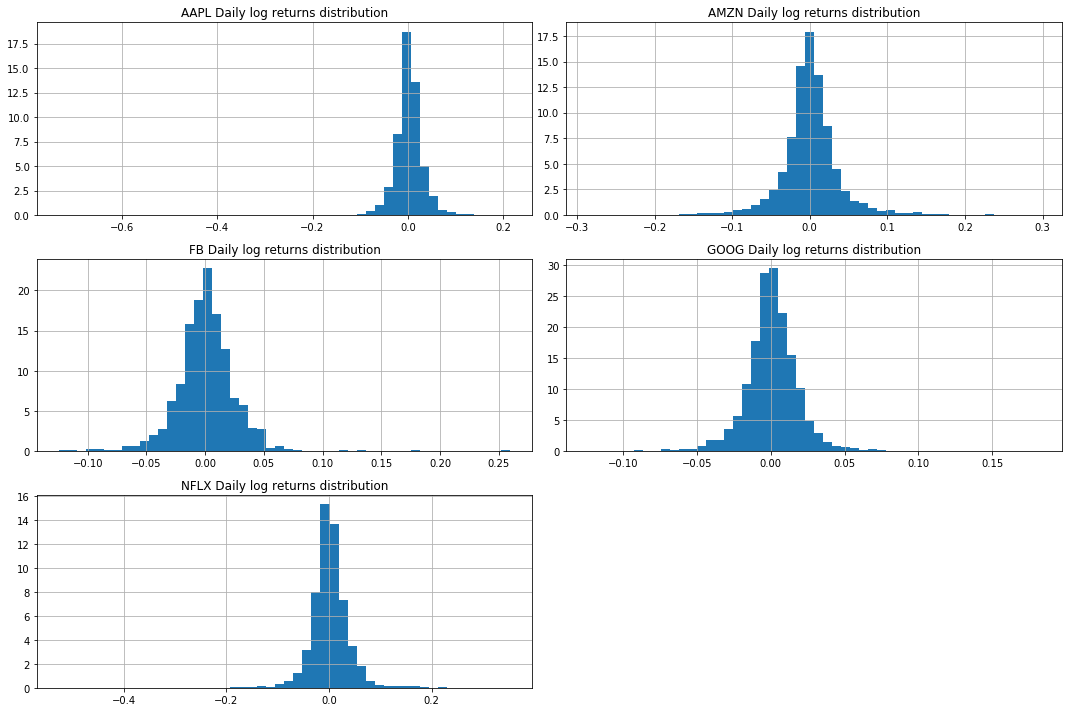

In [12]:
plt.figure(figsize=(15,10));
                       
for i, (symbol, sub_df) in enumerate(df_train_log_features.groupby(level=0)):
    plt.subplot(3, 2, i + 1);
    plt.hist(sub_df["Adj Close"].values, bins=50, density=True);
    plt.title(f"{symbol} Daily log returns distribution")
    plt.grid(True);
    
plt.tight_layout()